In [ ]:
! wget https://github.com/quilljs/cdn/raw/master/fonts/sailec.ttf

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont


In [61]:
def is_text_too_large(font, width, height):
    # Using multiline_textbbox to get the bounding box of the text
    textbbox = draw.multiline_textbbox((0, 0), text, font=font)
    # The bounding box is given as (left, top, right, bottom)
    textwidth = textbbox[2] - textbbox[0]
    textheight = textbbox[3] - textbbox[1]
    return textwidth > width or textheight > height


In [62]:
# Generating random color noise
random_image = (np.random.random((1024, 1024, 3)) * 255).astype('uint8')
r, g, b = random_image[:, :, 0], random_image[:, :, 1], random_image[:, :, 2]

In [58]:
# Your multiline text
text = "Some long text \nthat has to be added so that something"
font_path = 'sailec.ttf'

In [ ]:
r_image = Image.fromarray(r)

# Initialize the drawing context
draw = ImageDraw.Draw(r_image)

# Estimate an initial font size
font_size = int(r_image.width / 10)
font = ImageFont.truetype(font_path, font_size)

# Decrease font size until the text block fits
while is_text_too_large(font, r_image.width, r_image.height):
    font_size -= 1  # Decrease font size by 1
    font = ImageFont.truetype(font_path, font_size)

# Final font with adjusted size
font = ImageFont.truetype(font_path, font_size)

x = r_image.width / 100
y = r_image.height / 100

# Adding text onto the image, centered
draw.multiline_text((x, y), text, font=font, fill=125, align='left')

# Convert back to numpy array to display
r = np.array(r_image)


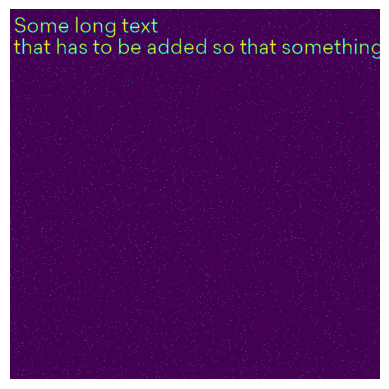

In [64]:
plt.imshow(r==125)
plt.axis('off')  # No axes for a cleaner look
plt.show()

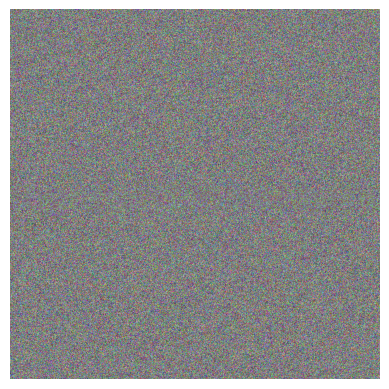

In [38]:
# Displaying the color image
plt.imshow(np.stack([r,g,b], axis=2))
plt.axis('off')  # No axes for a cleaner look
plt.show()